In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p>1. Evolución temporal de ventas por filial

1a. ¿Cómo han evolucionado las ventas (importe total) a lo largo del tiempo para cada fuente?

1.b ¿Cuál es la aportación de cada web a las ventas totales? Muestrelo gráficamente

2. Muestre un gráfico ordenando las ventas de los comerciales de mayor a menor
 2.a Muestre un gráfico con el porcentaje que suponen las ventas de cada comercial en la Fuente Rdp.



3. Descuentos y ampliaciones

1a Muestre gráficamente qué 3 comerciales tienen más descuentos
1b muestre gráficamente qué 3 comerciales tienen más ampliaciones


4. Cumplimiento de plazos

Pregunta: ¿Cuántas entregas se realizaron fuera de la fecha prevista (Fecha Entrega vs F.P.R.) y hay diferencias entre filiales o tipos de comercial?

Visualización sugerida: Gráfico de dispersión (scatter plot) o heatmap de retrasos (Fecha Entrega - F.P.R.) por filial y tipo de comercial.

5. Geolocalización de ventas

Pregunta: ¿Dónde se concentran las ventas en Madrid según las direcciones? ¿Hay zonas con mayor importe total?

Visualización sugerida: Mapa de calor (heatmap) o scatter plot georreferenciado usando latitud/longitud extraída de la columna Dirección y tamaño/color según Importe.</p>

In [52]:
ventas_total=pd.read_excel(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\portfolio\PowerBI\ventas2025.xlsx")

In [53]:
#transformo columna "fecha aceptación" de object a fecha
ventas_total["Fecha Acepta"]=pd.to_datetime(ventas_total["Fecha Acepta"],dayfirst=True)
#extraigo mes junto con año
ventas_total["Mes"]=ventas_total["Fecha Acepta"].dt.to_period("M")

In [54]:
ventas_total.drop("Column1",axis=1,inplace=True)
ventas_comerciales=ventas_total[ventas_total["Departamento"]=="Comercial"]

### 1. Evolución temporal de ventas por web

<p> 1a. ¿Cómo han evolucionado las ventas (importe total) a lo largo del tiempo para cada fuente? </p>


In [55]:
#Obtenemos las ventas desglosadas por mes y por fuente
ventas_mes=ventas_comerciales.groupby(["Mes","Fuente"])["Importe"].sum().reset_index()

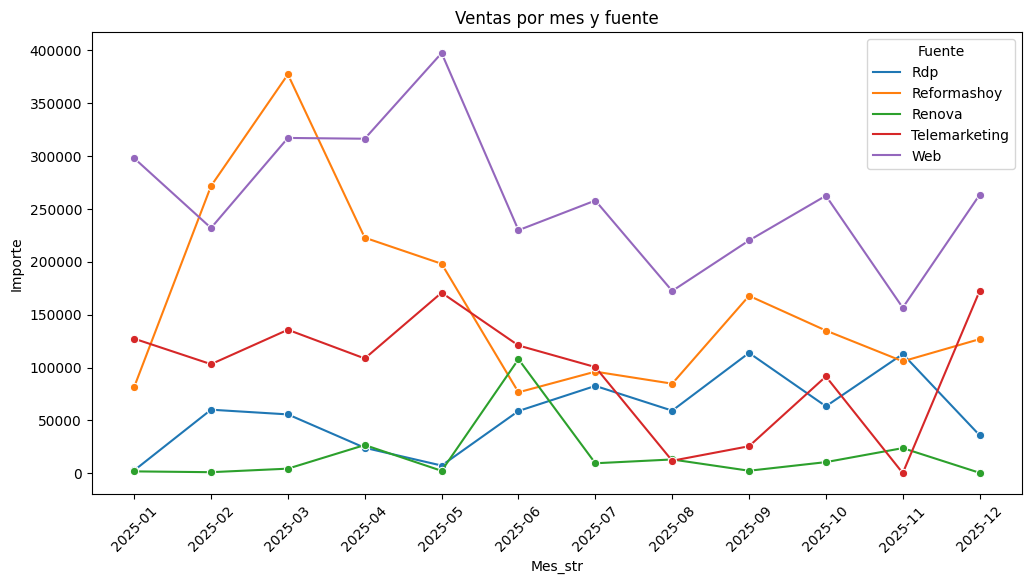

In [56]:
#creo mes en string para graficar
ventas_mes["Mes_str"] = ventas_mes['Mes'].astype(str)

#Creo el gráfico
plt.figure (figsize=(12,6))
sns.lineplot(data=ventas_mes, x="Mes_str", y="Importe", hue="Fuente", marker="o")
plt.xticks(rotation=45)
plt.title("Ventas por mes y fuente")
plt.show()

<p>Extra, obtener 1a también con pivot table</p>

In [57]:
#creo la tabla pivot
ventas_pivot_test= ventas_comerciales.pivot_table(index="Mes", columns="Fuente", values="Importe", aggfunc="sum")

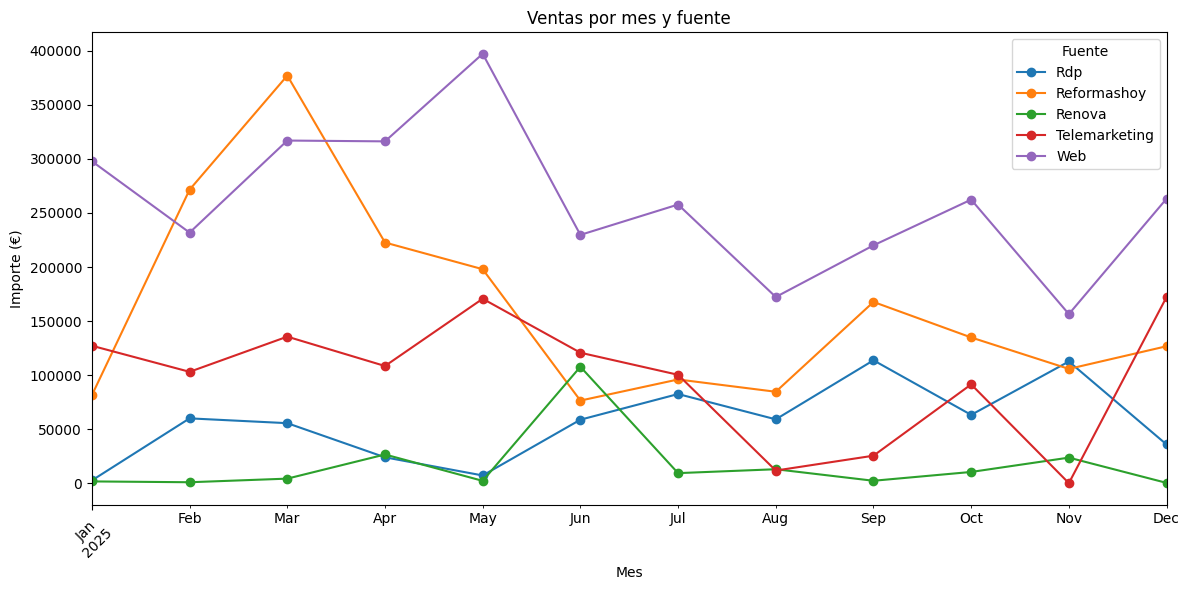

In [58]:
# Convertir Period a datetime para eje X continuo

ventas_pivot_test.plot(kind='line', figsize=(12,6), marker='o')

plt.title("Ventas por mes y fuente")
plt.xlabel("Mes")
plt.ylabel("Importe (€)")
plt.xticks(rotation=45)
plt.legend(title='Fuente')
plt.tight_layout()
plt.show()


#### 1.b ¿Cuál es la aportación de cada web a las ventas totales? Muestrelo gráficamente

In [59]:

import plotly.express as px

In [60]:
fig=px.pie(ventas_mes,values="Importe",names="Fuente")
fig.show()

<p> Extra: muestre las ventas y ordene las fuentes de mayor a menor </p>

In [61]:
ventas_fuente=ventas_comerciales.groupby("Fuente")["Importe"].sum().reset_index()

In [62]:
ventas_fuente.sort_values("Importe",ascending=False)

,Fuente,Importe
4,Web,3121655.09
1,Reformashoy,1943381.49
3,Telemarketing,1168086.65
0,Rdp,676674.71
2,Renova,204312.37


### 2. Ventas por comerciales

<p>Muestre un gráfico ordenando las ventas de los comerciales de mayor a menor
 </p>

In [63]:
ventas_agrupado= ventas_comerciales.groupby("Empleado").sum("Importe").sort_values(by="Importe",ascending=False).reset_index()

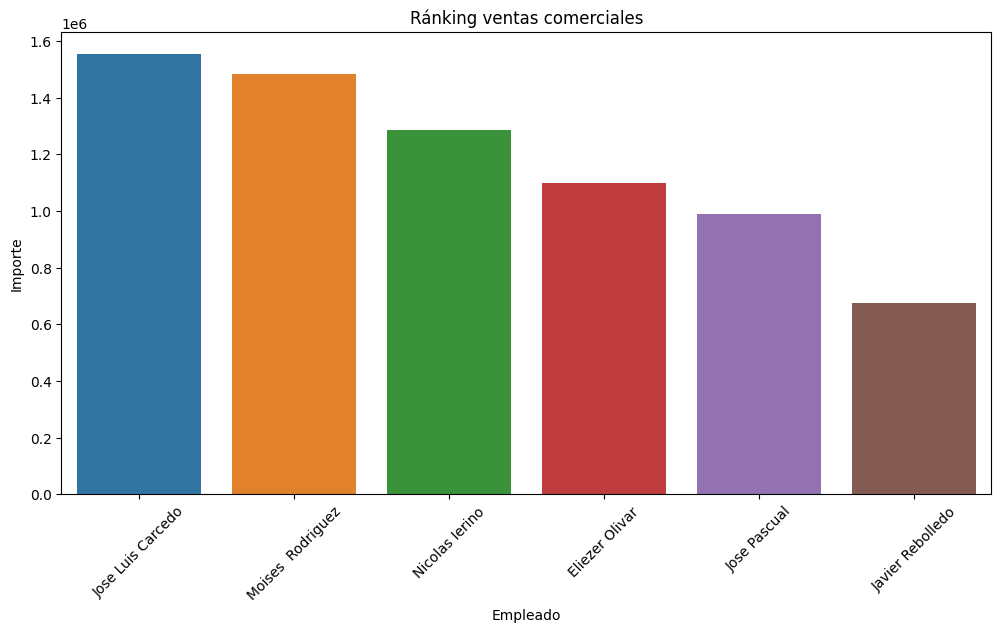

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(data=ventas_agrupado.head(6),x="Empleado",y="Importe")
plt.xticks(rotation=45)
plt.title ("Ránking ventas comerciales")
plt.show()

<p> 2.a Muestre un gráfico con el porcentaje que suponen las ventas de cada comercial en la Fuente Rdp  resalte a "Moises".</p>

In [65]:
ventas_comerciales_rdp=ventas_comerciales[ventas_comerciales["Fuente"]=="Rdp"]

In [66]:
ventas_comercial_agrupado_rdp=ventas_comerciales_rdp.groupby(["Comercial/Telemarketing/Técnico"])["Importe"].sum().reset_index().sort_values(by="Importe", ascending=False)

In [67]:
fig=go.Figure(data=[go.Pie(labels=ventas_comercial_agrupado_rdp["Comercial/Telemarketing/Técnico"], values=ventas_comercial_agrupado_rdp["Importe"],hole=0.5)])
fig

NameError: name 'go' is not defined

### 3. Descuentos y ampliaciones 

<p>3a Muestre gráficamente qué 3 comerciales tienen más descuentos</p>

In [68]:
mask_desc=ventas_comerciales["Servicio"]=="Descuentos"

In [74]:
ventas_comerciales_descuentos=ventas_comerciales[mask_desc]

In [81]:
pivot_desc=ventas_comerciales_descuentos.pivot_table(index="Empleado",values="Importe",aggfunc="sum").reset_index().sort_values(by="Importe",ascending=True)
pivot_desc

,Empleado,Importe
8,Nicolas Ierino,-111098.24
2,Eliezer Olivar,-72491.89
6,Jose Pascual,-64679.27
5,Jose Luis Carcedo,-56084.59
7,Moises Rodriguez,-32316.29
0,Autonomos,-30611.61
3,Javier Rebolledo,-8219.61
1,Daniel Olivar,-1038.70
4,Jesus Garrote,-201.00


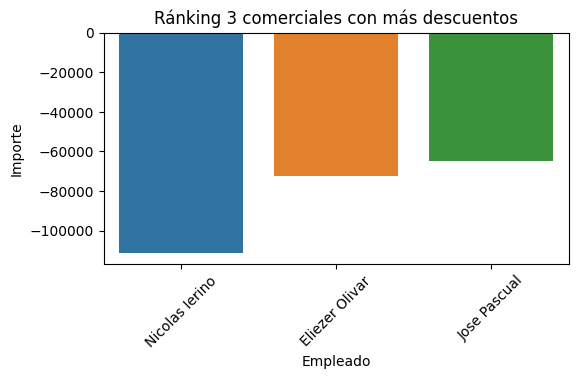

In [82]:
plt.figure(figsize=(6,3))
sns.barplot(data=pivot_desc.head(3),x="Empleado",y="Importe")
plt.xticks(rotation=45)
plt.title("Ránking 3 comerciales con más descuentos")
plt.show()

<p> 3b muestre gráficamente qué 3 comerciales tienen más ampliaciones </p>

In [87]:
mask_ventas_amp=ventas_comerciales['Servicio']=="Ampliaciones"
ventas_comerciales_amp=ventas_comerciales[mask_ventas_amp]

In [88]:
pivot_amp=

array(['Ampliaciones'], dtype=object)

,Comercial/Telemarketing/Técnico,Fecha Acepta,F.P.R.,Fecha Inicio,Fecha Entrega,PTO,Presupuesto Insitu,Dirección,Importe,Observaciones Pagos,Tipo,Departamento,Fuente,Origen,Empleado,Servicio,Column1,FAcepta fto fecha
26,AMPARO MONTOYA,07/04/2025,07/04/2025,14/05/2025,26/02/2025,67128,No,"C/ Dr Fourquet 32, 2º izda - 28012 MADRID (MAD...",-486.00,NaN,DESCUENTO DE OBRA,Teleoperadora,Otros,telemarketing,Amparo,Descuentos,1,2025-04-07
28,AMPARO MONTOYA,10/03/2025,10/04/2025,01/04/2025,25/02/2025,67207,Sí,"C/ Alameda del Valle 23, 3º 19 - 28031 MADRID ...",-1266.00,18/03 Nico lo entg** DCTO SIN FIRMAR X CLTE**S...,DESCUENTO DE OBRA,Teleoperadora,Otros,telemarketing,Amparo,Descuentos,1,2025-03-10
35,AMPARO MONTOYA,30/05/2025,30/05/2025,31/03/2025,16/01/2025,66948,No,"C/ Camino de los Alamillos 14, 1º A - 28891 V...",-336.00,02/06/25 X.O DE GLORIA METO DCTO POR PAGO DE L...,DESCUENTO DE OBRA,Teleoperadora,Otros,telemarketing,Amparo,Descuentos,1,2025-05-30
36,AMPARO MONTOYA,30/05/2025,30/05/2025,10/04/2025,13/02/2025,66999,No,"C/ Europa Avda 17, Portal 8, 2º 2 - 28224 POZU...",-17.75,X.O DE SANDRA METO DCTO** LOS 4 LEDS DEL BAÑO ...,DESCUENTO DE OBRA,Teleoperadora,Otros,telemarketing,Amparo,Descuentos,1,2025-05-30
40,AMPARO MONTOYA,12/11/2025,12/11/2025,NaN,29/09/2025,68540,No,"C/ de San Fermín avda 11, 2º Dcha. - 28041 MAD...",-818.68,NaN,DESCUENTO DE OBRA,Teleoperadora,Otros,telemarketing,Amparo,Descuentos,1,2025-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,Vasilia,12/12/2025,12/12/2025,15/12/2025,21/10/2025,68616,No,"C/ San Maximiliano 23, 3ºC - 28017 MADRID (MA...",-71.00,NaN,DESCUENTO DE OBRA,Tecnico,Web,webs,Vasilia,Descuentos,1,2025-12-12
8907,Vasilia,18/12/2025,18/12/2025,17/07/2025,04/04/2025,67428,No,"C/ Gran Via del Sureste Avda 18, Esc A 3ºB - 2...",-517.08,18/12 X.O DE SANDRA SE METE DCTO** CLTE SE NIE...,DESCUENTO DE OBRA,Tecnico,Reformashoy,externos,Vasilia,Descuentos,1,2025-12-18
8908,Vasilia,18/12/2025,18/12/2025,14/10/2025,22/05/2025,67709,No,"C/ Gran Vía De Hortaleza 5E, 8ºB - 28033 MADR...",-1078.64,NaN,DESCUENTO DE OBRA,Tecnico,Web,webs,Vasilia,Descuentos,1,2025-12-18
8909,Vasilia,18/12/2025,18/12/2025,19/05/2025,04/04/2025,67455,No,"C/ Juan Bautista Monegro 10, portal 4, 4º B -...",-1249.65,X.O DE GLORIA METO DCTO POR MALA EJECUACION Y ...,DESCUENTO DE OBRA,Tecnico,Otros,telemarketing,Vasilia,Descuentos,1,2025-12-18
